# Reinforcement Learning - Minimal Q-learning bot

### Some terms:
- Agent: An entity containing possible actions and policy functions, acts in the environment (example: A robot vacuum)
- Environment: the bounded (or unbounded) are where the agent operates (example: An apartment)
- State : Interpreted information about the environment (example: An image of the apartment in the direction the robot vacuum is facing)
- Reward : Imediate value of performing some action (example: Action: You work overtime to fix a bug, reward: Pat on the back and a "Good job!")
- Policy : A mapping between a state and an action (example: floor: dirty -> action: clean)
- Episode: A bounded number of time steps in the environment

<img src="img/2560px-Reinforcement_learning_diagram.png" alt="drawing" width="500"/>

## GridWorld:

<img src="img/gridworld.png" alt="drawing" width="500"/>

In [6]:
from qlearning import QLearner
from grid_world import GridWorld
import pandas as pd
import numpy as nd

In [7]:
def newBoard(): 
    board = [   
        0,0,0,0,0,
        0,1,0,0,0,
        0,0,0,0,0,
        0,0,0,0,0,
        0,0,0,0,0]

    rewards = dict()
    rewards[24] = nd.array([100, 100])
    rewards[4] = nd.array([-10, -50])
    rewards[19] = nd.array([-20, -70])

    grid_world = GridWorld(board, rewards, 6, 24, 5, 5)
    return grid_world

In [8]:
def qlearner(learning_rate=0.1, discount_factor=0.9, explore_rate = 0.01):
    learner = QLearner(['up', 'down', 'right', 'left'], learning_rate, discount_factor, explore_rate, objectives=2)
    episodes = list()
    for episode in range(1, 200):
        totalValue = 0
        actions = list()
        world = newBoard()
        learner.start_episode(world.actor_pos)

        end = False
        while end != True:
            action = learner.act(world.actor_pos)
            actions.append(action)
            value, end = world.act(action)
            totalValue += value[0]
            learner.reward(value, world.actor_pos)

        learner.end_episode()
        episodes.append((episode, totalValue, actions))
    return learner, episodes

In [9]:
def episodes_to_df(episodes, columns=['episode', 'total value', 'actions']) -> pd.DataFrame:
    return pd.DataFrame(episodes, columns=columns)

def print_actions(episodes):
    for episode, totalValue, actions in episodes:
        print("Episode: {}, total value: {}, actions: {}".format(episode, totalValue, actions))

In [10]:
q1, q1_episodes = qlearner()
q1_df = episodes_to_df(q1_episodes)

q2, q2_episodes = qlearner(learning_rate=0.2, explore_rate=0.1)
q2_df = episodes_to_df(q2_episodes)

q3, q3_episodes = qlearner(learning_rate=0.5)
q3_df = episodes_to_df(q3_episodes)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

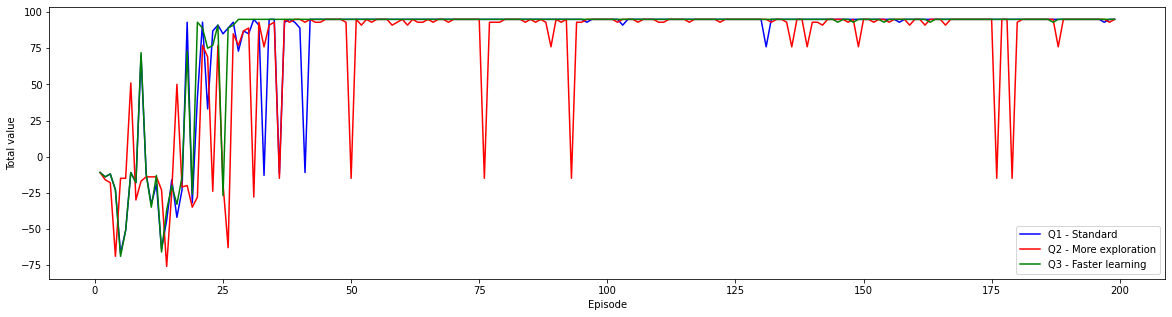

In [ ]:
from matplotlib import pyplot
pyplot.figure(figsize=(20,5))
pyplot.plot(range(1, 200), q1_df['total value'], 'b-')
pyplot.plot(range(1, 200), q2_df['total value'], 'r-')
pyplot.plot(range(1, 200), q3_df['total value'], 'g-')
pyplot.ylabel("Total value")
pyplot.xlabel("Episode")
pyplot.legend(['Q1 - Standard','Q2 - More exploration', 'Q3 - Faster learning'])
pyplot.show()

In [ ]:
import collections
od = collections.OrderedDict(sorted(q1.Q.items()))
actions = [value for _, value in od.items()]
q_value_df = pd.DataFrame(actions, columns=['Up', 'Down', 'Right', 'Left'])
q_value_df

,Up,Down,Right,Left
0,[-1.9900000000000002],[-1.0752535864834853],[-1.0235020298945576],[-1.9900000000000002]
1,[-1.9900000000000002],[-1.1246491914446675],[-1.0966554112329063],[-1.175531416466709]
2,[-1.0],[2.2917564385393785],[-0.944605288799485],[-0.9554861393506939]
3,[-1.0],[-0.7543899586374241],[-5.0],[-0.7620956762803233]
4,[-1.0],[-0.1],[0],[0]
5,[-1.1019426208174137],[-1.1266606592106039],[-1.1442561607101658],[-1.9900000000000002]
6,[-1.427565250572481],[-1.395513359160938],[54.93957831671148],[-1.4275223750267463]
7,[-1.0133177635710908],[62.16693786204591],[-0.8413129669672783],[3.9124182302103323]
8,[-0.5733491585883227],[-0.43579164216700006],[-0.6316344016343398],[-0.6603496173752894]
9,[-5.0],[-0.47704092362821],[-1.0],[-0.5292295418521]
